# https://colab.research.google.com/drive/1B61iKt2T2KecYBjSYVUT71kRPM2FTkJ8#scrollTo=izXrV8RLtmST 

#Import Library



In [1]:
from google.colab import drive
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

  # Connection To Drive



In [2]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd gdrive/MyDrive/Data\ Jeruk

/content/gdrive/MyDrive/Data Jeruk


In [4]:
%ls

'Data Testing'/  'Data Training'/


# Menyiapkan Data Training Dan Data Testing

In [5]:
training_data = "Data Training/"
testing_data = "Data Testing/"

In [6]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
    directory= training_data,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset="training"
)

validation_generator = train_datagen.flow_from_directory(
        training_data,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        class_mode="categorical",
        subset="validation"
)


test_generator = test_datagen.flow_from_directory(
    directory= testing_data,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 240 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


# Load model VGG16

In [9]:
base_model = VGG16(weights=None, include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape=(224, 224, 3 )))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units= 2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    batch_size= 32,
    shuffle= True)

Epoch 1/10
8/8 [==============================] - 68s 7s/step - loss: 0.7726 - accuracy: 0.5250 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 39s 5s/step - loss: 0.6947 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 38s 5s/step - loss: 0.6970 - accuracy: 0.4917 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 37s 5s/step - loss: 0.6878 - accuracy: 0.5500 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 38s 5s/step - loss: 0.6952 - accuracy: 0.5000 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 6/10
8/8 [==============================] - 38s 4s/step - loss: 0.6944 - accuracy: 0.4750 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
8/8 [==============================] - 37s 5s/step - loss: 0.6929 - accuracy: 0.4917 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/10
8/8 [==================

In [12]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']

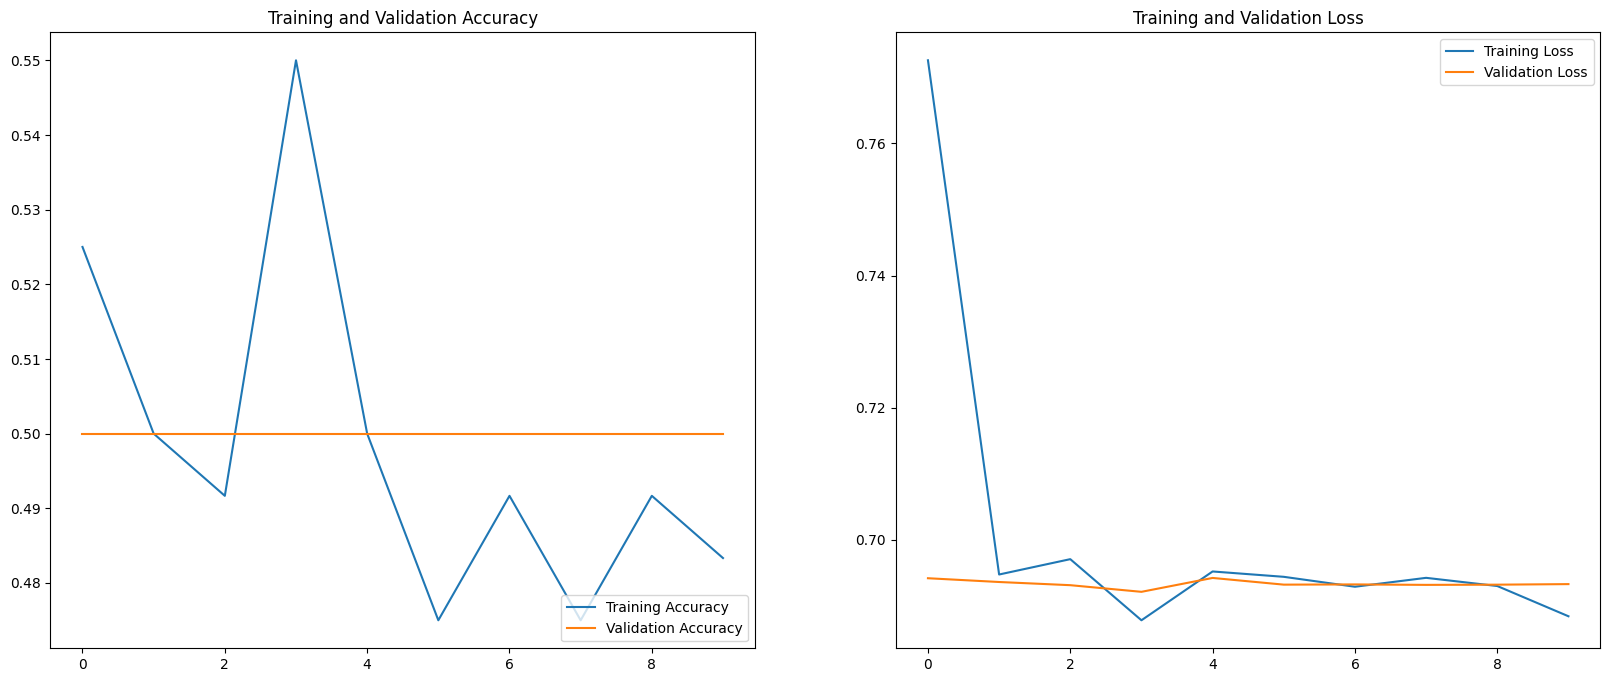

In [13]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), accuracy, label='Training Accuracy')
plt.plot(range(10), validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluasi Model

In [16]:
test_loss, test_accuracy = model.evaluate(test_generator)

print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

10/10 [==============================] - 27s 3s/step - loss: 0.6933 - accuracy: 0.5000

Test Loss: 0.6932845115661621
Test Accuracy: 0.5


# Memprediksi Gambar

In [22]:
predict_data = "Data Prediksi/"
predict_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    predict_data,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode="categorical",
)

Found 4 images belonging to 2 classes.


In [27]:
class_names = ['Jeruk Mentah', 'Jeruk Matang']


In [28]:
def predict(model, img):
    #img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = round(100 * (np.max(predictions)), 1)
    return predicted_class, confidence

1/1 [==============================] - 0s 21ms/step


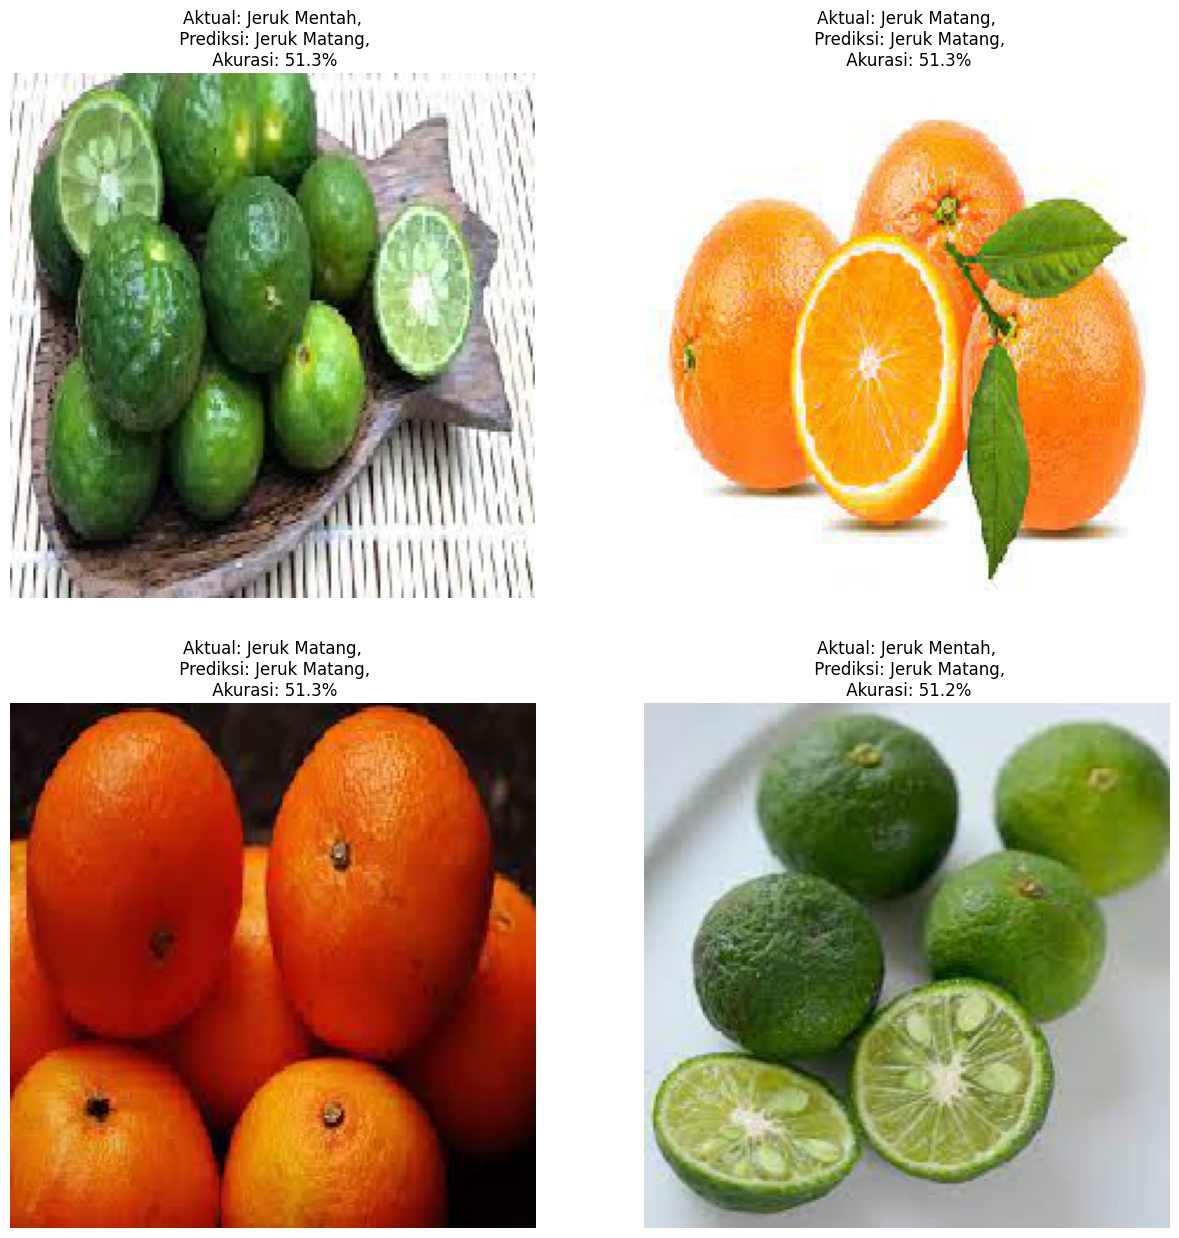

In [30]:
plt.figure(figsize=(15, 15))

for images, labels in predict_gen:
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i][0])] 
        plt.title(f"Aktual: {actual_class},\n Prediksi: {predicted_class},\n Akurasi: {confidence}%")
        plt.axis("off")
    break